<a href="https://colab.research.google.com/github/PatrykCiwinski/Topic_modeling-LDA/blob/main/Topic_modeling(LDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LDA

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import textwrap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!gdown 1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4

Downloading...
From: https://drive.google.com/uc?id=1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4
To: /content/bbc_text_cls.csv
100% 5.09M/5.09M [00:00<00:00, 128MB/s]


In [6]:
df=pd.read_csv('bbc_text_cls.csv')

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
#stop-words
stop_words=set(stopwords.words('english'))

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [13]:
df['cleaned_text']=df['text'].apply(clean_text)

In [14]:
vectorizer = TfidfVectorizer(max_features=1000)

In [15]:
X=vectorizer.fit_transform(df['cleaned_text'])

In [16]:
no_topics=df['labels'].nunique()

In [17]:
lda=LatentDirichletAllocation(n_components=no_topics)

In [18]:
Z = lda.fit_transform(X)

In [19]:
topics = lda.components_

In [20]:
# Print the topics with their terms
terms = vectorizer.get_feature_names_out()

for index, component in enumerate(topics):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['said', 'labour', 'election', 'party', 'blair', 'government', 'would']
Topic 2:  ['said', 'film', 'year', 'company', 'firm', 'market', 'people']
Topic 3:  ['game', 'player', 'club', 'england', 'match', 'said', 'team']
Topic 4:  ['mobile', 'phone', 'handset', 'camera', 'operator', 'send', 'message']
Topic 5:  ['band', 'album', 'song', 'chart', 'music', 'search', 'rock']


# We can forecast topics as follows:

Topic 1:politics,
Topic 2:business,
Topic 3:sport,
Topic 4:tech,
Topic 5:entertainment

In [21]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [97]:
i = np.random.choice(len(df))
z=Z[i]
topics=np.arange(5)+1

In [98]:
z_df = pd.DataFrame(z)
max_value = z_df.idxmax()

In [99]:
max_idx = max_value.tolist()

In [100]:
print(wrap(df.iloc[i]['cleaned_text']))

Whitehall shredding increasing Tories Civil servant drastically
stepped shredding official document figure compiled Tories suggest
Some government department doubled number document shredded ahead
Freedom Information implementation January Departments defence
environment trade increased file destruction said following rule
governing public record Tories want information commissioner
investigate Freedom Information first time give member public access
government record previously kept secret year Political Correspondent
James Hardy said prospect outsider poking nose inner working Whitehall
appeared causing jitter among mandarin Liberal Democrat Alan Beith
chair select committee monitor Department Constitutional Affairs said
claim true Whitehall acting entirely spirit Both information
commissioner select committee keep issue close scrutiny Fellow Norman
Baker said episode painted unflattering picture inner working
government clear government initial enthusiasm open government turned
self

In [101]:
pred_topics = {'Topic 1':'politics',
'Topic 2':'business',
'Topic 3':'sport',
'Topic 4':'tech',
'Topic 5':'entertainment'}

In [102]:
values = list(pred_topics.values())


Text(0.5, 1.0, 'True label: politics, pred_label politics')

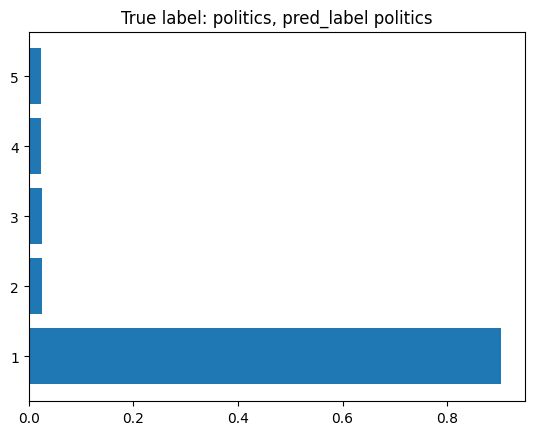

In [103]:
fig,ax= plt.subplots()
ax.barh(topics,z)
ax.set_title(f'True label: {df.iloc[i]["labels"]}, pred_label {values[max_value[0]]}')